<a href="https://colab.research.google.com/github/bharani018/CUSTOMER_SEGMENTATION/blob/main/CUSTOMER_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CUSTOMER SEGMENTATION AND BEHAVIOUR ANALYSIS


IMPORTING LIBRARIES

In [1]:

import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read csv

data = pd.read_csv('/content/drive/MyDrive/customer_segmentation.csv',index_col=False)

data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [4]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [5]:
data.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
dtype: int64

EXPLORATORY DATA ANALYSIS AND DATA PROCESSING


In [6]:
data.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [7]:
print(data.duplicated())

print(data.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
10690    False
10691    False
10692    False
10693    False
10694    False
Length: 10695, dtype: bool
0


In [8]:
#forward fill of missing values
def forward_fill(df):
    df_filled = df.apply(lambda col: col.fillna(method='ffill') if col.isnull().any() else col, axis=0)
    return df_filled

data  = forward_fill(data)

In [9]:
data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [10]:
data = data.drop(['Var_1'],axis = 1)
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,A


In [11]:
distinct_age = data['Age'].unique()
distinct_age.sort()

distinct_age

array([18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89])

REMOVING OUTLIERS


AGE GREATER THAN 80


In [12]:
#HANDLING OUTLIERS


data = data[data["Age"]<80]

distinct_age = data['Age'].unique()
distinct_age.sort()

distinct_age

array([18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79])

In [13]:
gender_counts = data["Gender"].value_counts()
gender_counts

Male      5595
Female    4663
Name: Gender, dtype: int64

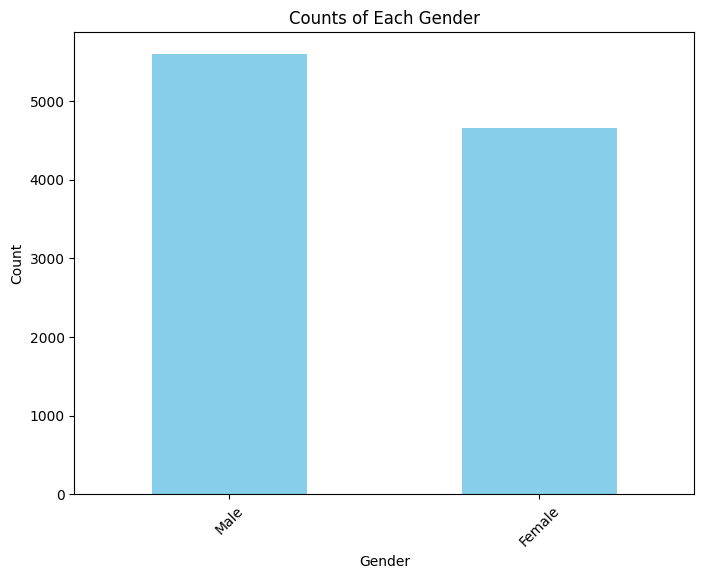

In [14]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

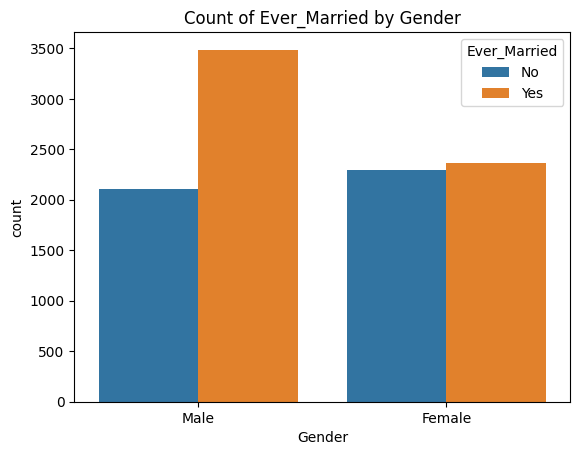

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical-Categorical Relationships
sns.countplot(x='Gender', hue='Ever_Married', data=data)
plt.title('Count of Ever_Married by Gender')
plt.show()




In [16]:
data['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

In [17]:
data['Profession'].value_counts()

Artist           3330
Healthcare       1778
Entertainment    1257
Doctor            951
Engineer          941
Executive         734
Lawyer            526
Marketing         408
Homemaker         333
Name: Profession, dtype: int64

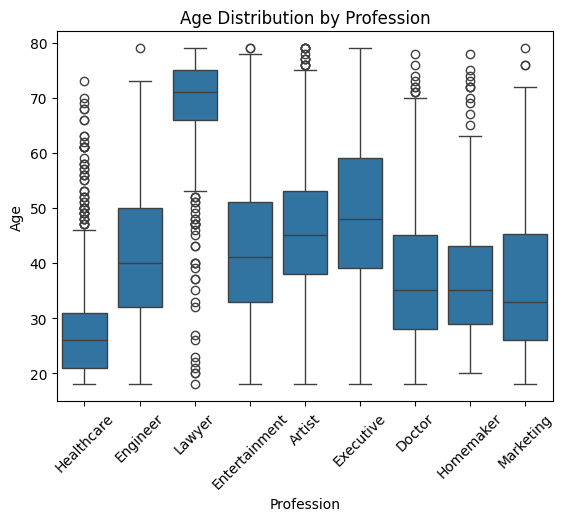

In [18]:
# Categorical-Numerical Relationships
sns.boxplot(x='Profession', y='Age', data=data)
plt.title('Age Distribution by Profession')
plt.xticks(rotation=45)
plt.show()

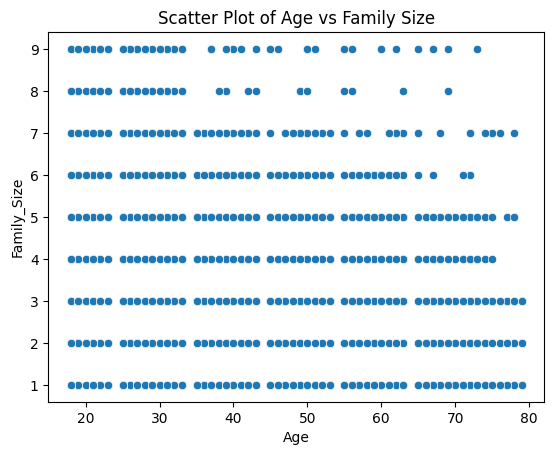

In [19]:
# Numerical-Numerical Relationships
sns.scatterplot(x='Age', y='Family_Size', data=data)
plt.title('Scatter Plot of Age vs Family Size')
plt.show()

In [20]:
mean_age = data['Age'].mean()
mean_age


41.76340417235328

In [21]:
median_age = data['Age'].median()
median_age


40.0

In [22]:
mean_family_size = data['Family_Size'].mean()
mean_family_size

2.8869175277831935

In [23]:
median_fam_size = data['Family_Size'].median()
median_fam_size

3.0

In [24]:
'''
# Define a mapping dictionary for converting spending scores to numerical values
spending_score_mapping = {'Low': 1, 'Average': 2, 'High':3}

# Replace spending score values with numerical equivalents
data['Spending_Score'] = data['Spending_Score'].map(spending_score_mapping)

# Print the updated DataFrame
print(data)'''

"\n# Define a mapping dictionary for converting spending scores to numerical values\nspending_score_mapping = {'Low': 1, 'Average': 2, 'High':3}\n\n# Replace spending score values with numerical equivalents\ndata['Spending_Score'] = data['Spending_Score'].map(spending_score_mapping)\n\n# Print the updated DataFrame\nprint(data)"

In [25]:
data['Spending_Score']

0            Low
1        Average
2            Low
3           High
4           High
          ...   
10690        Low
10691        Low
10692        Low
10693       High
10694        Low
Name: Spending_Score, Length: 10258, dtype: object

In [26]:
spending_score_mapping = {'Low': 1, 'Average': 2, 'High':3}

# Replace spending score values with numerical equivalents
data['Spending_Score'] = data['Spending_Score'].map(spending_score_mapping)

# Print the updated DataFrame
print(data)

           ID  Gender Ever_Married  Age Graduated     Profession  \
0      462809    Male           No   22        No     Healthcare   
1      462643  Female          Yes   38       Yes       Engineer   
2      466315  Female          Yes   67       Yes       Engineer   
3      461735    Male          Yes   67       Yes         Lawyer   
4      462669  Female          Yes   40       Yes  Entertainment   
...       ...     ...          ...  ...       ...            ...   
10690  467954    Male           No   29        No     Healthcare   
10691  467958  Female           No   35       Yes         Doctor   
10692  467960  Female           No   53       Yes  Entertainment   
10693  467961    Male          Yes   47       Yes      Executive   
10694  467968  Female           No   43       Yes     Healthcare   

       Work_Experience  Spending_Score  Family_Size Segmentation  
0                  1.0               1          4.0            D  
1                  1.0               2          3

In [27]:
data['Spending_Score'].std()

0.7188733157838573

In [28]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,1,4.0,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,2,3.0,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,1,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,3,2.0,B
4,462669,Female,Yes,40,Yes,Entertainment,0.0,3,6.0,A


In [29]:
'''
from sklearn.preprocessing import StandardScaler


# Age binning
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 20, 40, 60, float('inf')], labels=['<20', '20-40', '40-60', '60+'])

# Interaction feature: Age * Family_Size
data['Age_Family_Size'] = data['Age'] * data['Family_Size']

# Feature scaling for numerical features
scaler = StandardScaler()
data[['Age', 'Work_Experience', 'Family_Size', 'Age_Family_Size']] = scaler.fit_transform(data[['Age', 'Work_Experience', 'Family_Size', 'Age_Family_Size']])

# Print the updated DataFrame with engineered features
print(data)
'''

"\nfrom sklearn.preprocessing import StandardScaler\n\n\n# Age binning\ndata['Age_Group'] = pd.cut(data['Age'], bins=[0, 20, 40, 60, float('inf')], labels=['<20', '20-40', '40-60', '60+'])\n\n# Interaction feature: Age * Family_Size\ndata['Age_Family_Size'] = data['Age'] * data['Family_Size']\n\n# Feature scaling for numerical features\nscaler = StandardScaler()\ndata[['Age', 'Work_Experience', 'Family_Size', 'Age_Family_Size']] = scaler.fit_transform(data[['Age', 'Work_Experience', 'Family_Size', 'Age_Family_Size']])\n\n# Print the updated DataFrame with engineered features\nprint(data)\n"

In [30]:
'''import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Feature selection
X = data.drop(columns=['ID', 'Segmentation'])

# Preprocessing pipeline
numerical_features = ['Age', 'Work_Experience', 'Family_Size']
categorical_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('kmeans', KMeans(n_clusters=3, random_state=42))])

# Fit the model
pipeline.fit(X)

# Add cluster labels to the dataframe
data['Cluster'] = pipeline.named_steps['kmeans'].labels_

# Analyze the clusters
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)
'''


"import pandas as pd\nfrom sklearn.cluster import KMeans\nfrom sklearn.preprocessing import StandardScaler, OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.pipeline import Pipeline\n\n\n# Feature selection\nX = data.drop(columns=['ID', 'Segmentation'])\n\n# Preprocessing pipeline\nnumerical_features = ['Age', 'Work_Experience', 'Family_Size']\ncategorical_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']\n\npreprocessor = ColumnTransformer(\n    transformers=[\n        ('num', StandardScaler(), numerical_features),\n        ('cat', OneHotEncoder(), categorical_features)])\n\n# Clustering pipeline\npipeline = Pipeline(steps=[('preprocessor', preprocessor),\n                           ('kmeans', KMeans(n_clusters=3, random_state=42))])\n\n# Fit the model\npipeline.fit(X)\n\n# Add cluster labels to the dataframe\ndata['Cluster'] = pipeline.named_steps['kmeans'].labels_\n\n# Analyze the clusters\ncluster_analysis = data.groupby('C

In [31]:
#cluster_analysis.head()

In [32]:
young_family_with_high_spending = data[(data['Spending_Score']==3 ) & (data['Family_Size']<=5)]
young_family_with_high_spending


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
3,461735,Male,Yes,67,Yes,Lawyer,0.0,3,2.0,B
19,464291,Female,Yes,79,Yes,Artist,0.0,3,1.0,C
45,463156,Female,Yes,79,No,Lawyer,8.0,3,2.0,A
62,464091,Male,Yes,74,Yes,Lawyer,0.0,3,3.0,D
63,464535,Male,Yes,56,Yes,Lawyer,1.0,3,2.0,A
...,...,...,...,...,...,...,...,...,...,...
10659,467868,Female,Yes,66,Yes,Entertainment,0.0,3,2.0,B
10660,467876,Female,Yes,50,Yes,Artist,9.0,3,2.0,B
10661,467879,Female,Yes,51,Yes,Artist,9.0,3,4.0,B
10673,467905,Male,Yes,37,Yes,Executive,0.0,3,3.0,B


In [33]:
def groupby_count(data, groupby_cols, count_col, filter_cols=None):
    if filter_cols:
        data = data[filter_cols + groupby_cols + [count_col]]
    else:
        data = data[groupby_cols + [count_col]]
    return data.groupby(by=groupby_cols).count()

In [34]:
groupby_count(data, ['Spending_Score','Profession'], 'ID')

ID
Spending_Score Profession         
1              Artist         1706
               Doctor          651
               Engineer        564
               Entertainment   776
               Executive       155
               Healthcare     1659
               Homemaker       219
               Lawyer          233
               Marketing       336
2              Artist         1323
               Doctor          253
               Engineer        302
               Entertainment   421
               Executive        99
               Healthcare       61
               Homemaker        81
               Lawyer           21
               Marketing        28
3              Artist          301
               Doctor           47
               Engineer         75
               Entertainment    60
               Executive       480
               Healthcare       58
               Homemaker        33
               Lawyer          272
               Marketing        44

In [35]:
groupby_count(data,['Spending_Score','Ever_Married'],'ID')

ID
Spending_Score Ever_Married      
1              No            4366
               Yes           1933
2              No              13
               Yes           2576
3              No              27
               Yes           1343

In [36]:
groupby_count(data,['Spending_Score','Family_Size'],'ID')

ID
Spending_Score Family_Size      
1              1.0          1876
               2.0          1362
               3.0          1118
               4.0          1044
               5.0           508
               6.0           202
               7.0            94
               8.0            52
               9.0            43
2              1.0            20
               2.0          1081
               3.0           609
               4.0           565
               5.0           216
               6.0            65
               7.0            18
               8.0             6
               9.0             9
3              1.0            26
               2.0           594
               3.0           275
               4.0           283
               5.0           120
               6.0            33
               7.0            18
               8.0             7
               9.0            14

In [37]:
groupby_count(data,['Profession','Ever_Married'],'ID')

ID
Profession    Ever_Married      
Artist        No            1001
              Yes           2329
Doctor        No             495
              Yes            456
Engineer      No             361
              Yes            580
Entertainment No             482
              Yes            775
Executive     No              52
              Yes            682
Healthcare    No            1551
              Yes            227
Homemaker     No             153
              Yes            180
Lawyer        No              51
              Yes            475
Marketing     No             260
              Yes            148

\

In [38]:
data = data.drop(columns = ['Segmentation'])

In [39]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,1,4.0
1,462643,Female,Yes,38,Yes,Engineer,1.0,2,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,1,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,3,2.0
4,462669,Female,Yes,40,Yes,Entertainment,0.0,3,6.0


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset


# Perform exploratory data analysis (EDA)
print(data.info())  # Display basic information about the dataset
print(data.describe())  # Summary statistics for numerical columns
print(data.head())  # Display the first few rows of the dataset







<class 'pandas.core.frame.DataFrame'>
Int64Index: 10258 entries, 0 to 10694
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10258 non-null  int64  
 1   Gender           10258 non-null  object 
 2   Ever_Married     10258 non-null  object 
 3   Age              10258 non-null  int64  
 4   Graduated        10258 non-null  object 
 5   Profession       10258 non-null  object 
 6   Work_Experience  10258 non-null  float64
 7   Spending_Score   10258 non-null  int64  
 8   Family_Size      10258 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 801.4+ KB
None
                  ID           Age  Work_Experience  Spending_Score  \
count   10258.000000  10258.000000     10258.000000    10258.000000   
mean   463475.187171     41.763404         2.668551        1.519497   
std      2591.719212     14.771335         3.414509        0.718873   
min    458982.000000     18.00000

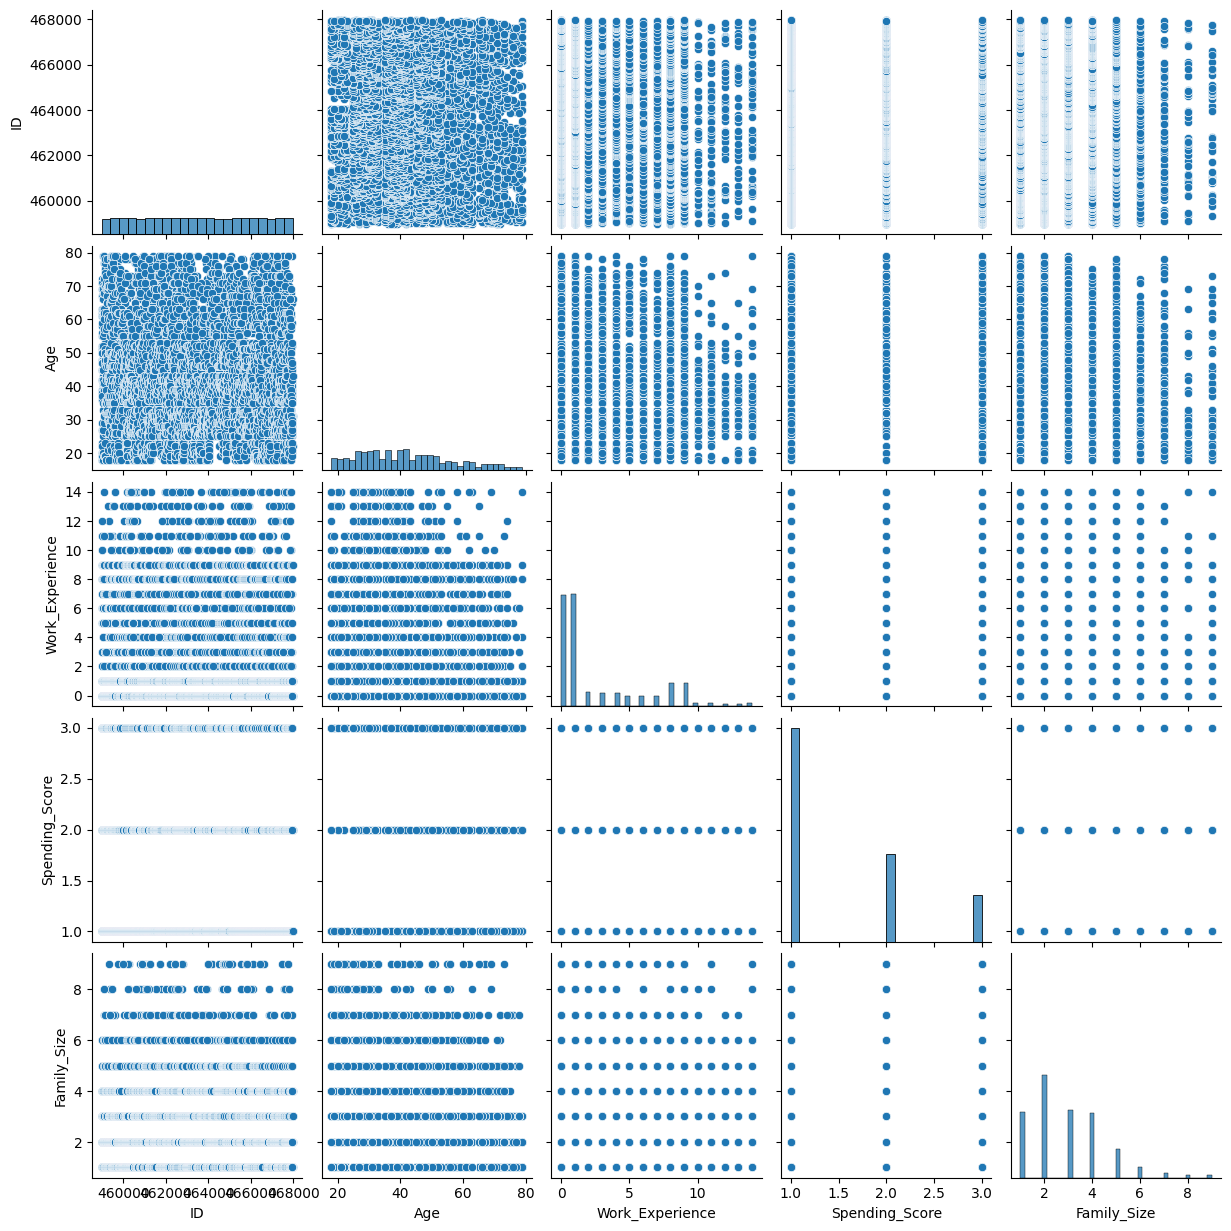

In [41]:

# Visualize distributions of numerical features
sns.pairplot(data)
plt.show()


<ipython-input-42-a3af9350fe4a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


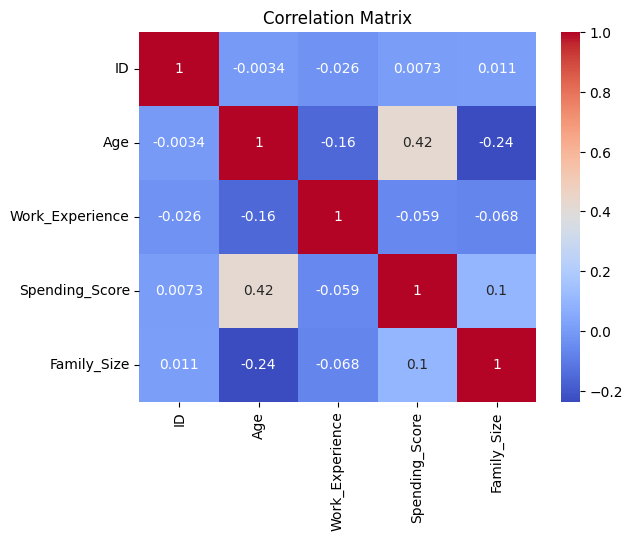

In [42]:
# Visualize correlations between numerical features
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

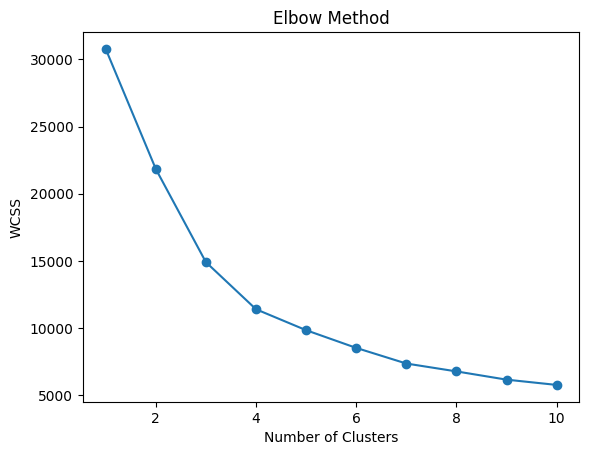

In [43]:

# Implement K-means clustering for segmentation
# Select relevant features for clustering
X = data[['Age', 'Work_Experience', 'Family_Size']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:

# Fit K-means clustering algorithm with optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)


# Add cluster labels to the dataframe
data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


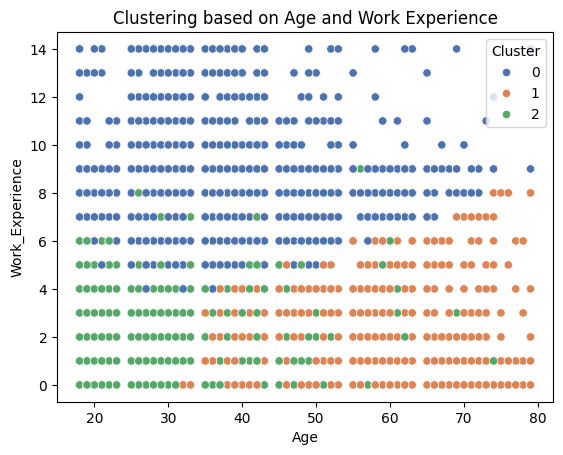

In [45]:



# Visualize the clusters
sns.scatterplot(x='Age', y='Work_Experience', hue='Cluster', data=data, palette='deep')
plt.title('Clustering based on Age and Work Experience')
plt.show()

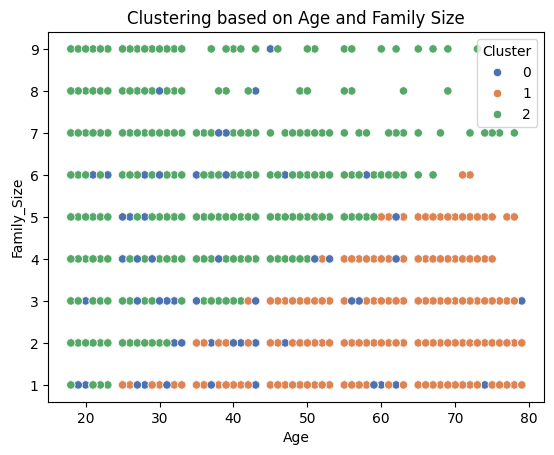

<ipython-input-46-26b214001dbf>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = data.groupby('Cluster').mean()


In [46]:

sns.scatterplot(x='Age', y='Family_Size', hue='Cluster', data=data, palette='deep')
plt.title('Clustering based on Age and Family Size')
plt.show()

# Analyze the clusters
cluster_analysis = data.groupby('Cluster').mean()


In [47]:
cluster_analysis.head()

,ID,Age,Work_Experience,Spending_Score,Family_Size
Cluster,,,,,
0,463367.694397,37.201613,8.241935,1.435484,2.509762
1,463471.856510,52.506066,0.943070,1.659589,2.057163
2,463549.171737,32.002489,1.082412,1.408186,4.116150


In [48]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Cluster
0,462809,Male,No,22,No,Healthcare,1.0,1,4.0,2
1,462643,Female,Yes,38,Yes,Engineer,1.0,2,3.0,2
2,466315,Female,Yes,67,Yes,Engineer,1.0,1,1.0,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,3,2.0,1
4,462669,Female,Yes,40,Yes,Entertainment,0.0,3,6.0,2


In [49]:
data['Graduated'].isnull().sum()

0

In [50]:

# Define colors for each profession
profession_colors = {
    'Healthcare': 'blue',
    'Engineer': 'green',
    'Lawyer': 'red',
    'Entertainment': 'orange',
    'Artist': 'purple',
    'Executive': 'brown',
    'Doctor': 'pink',
    'Homemaker': 'gray',
    'Marketing': 'cyan'
}

profession_order = ['Artist', 'Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Executive', 'Doctor', 'Homemaker', 'Marketing']


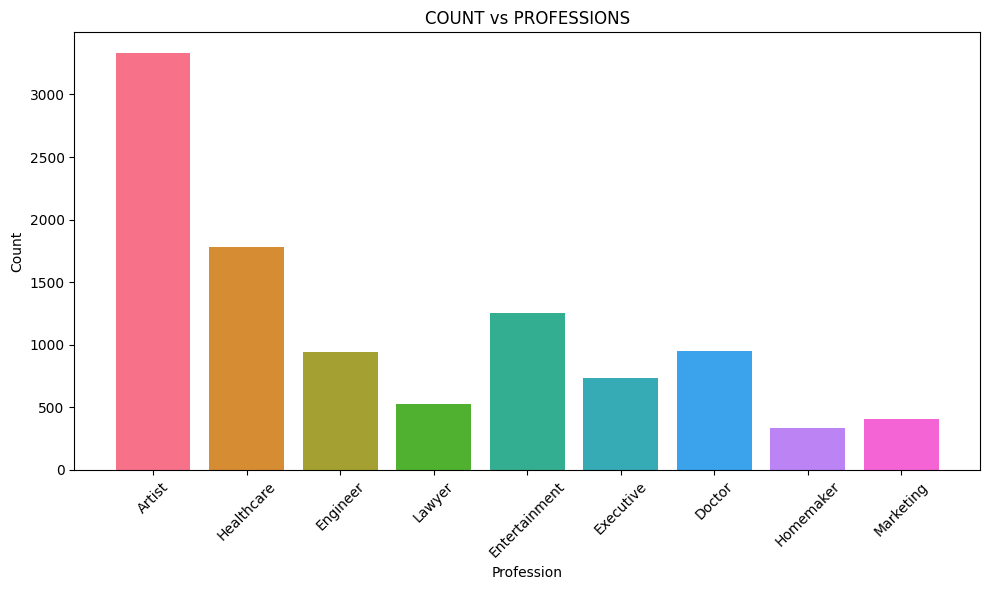

In [51]:



profession_counts = data["Profession"].value_counts()
# Define the fixed order of professions

# Define custom color palette
custom_palette = sns.color_palette("husl", len(profession_order))

# Map professions to colors using custom palette
profession_colors = dict(zip(profession_order, custom_palette))

# Plot bar chart with fixed profession order and colors
plt.figure(figsize=(10, 6))
bars = plt.bar(profession_order, [profession_counts.get(profession, 0) for profession in profession_order], color=[profession_colors[profession] for profession in profession_order])

# Add labels and title
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('COUNT vs PROFESSIONS')
plt.tight_layout()
plt.show()



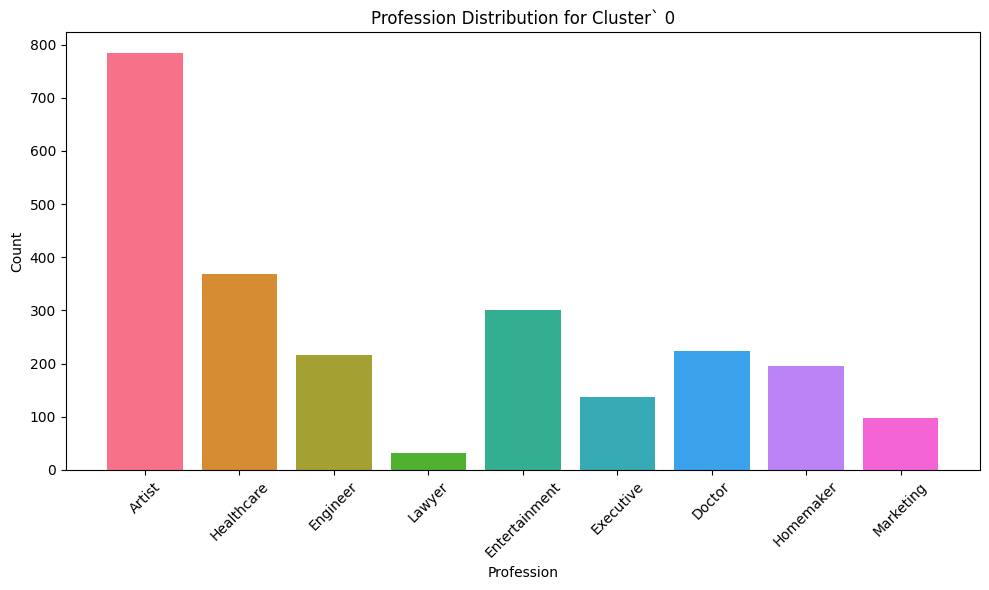

In [52]:

cluster_0 = data[data['Cluster'] == 0]

profession_counts = cluster_0['Profession'].value_counts()
# Define the fixed order of professions

# Define custom color palette
custom_palette = sns.color_palette("husl", len(profession_order))

# Map professions to colors using custom palette
profession_colors = dict(zip(profession_order, custom_palette))

# Plot bar chart with fixed profession order and colors
plt.figure(figsize=(10, 6))
bars = plt.bar(profession_order, [profession_counts.get(profession, 0) for profession in profession_order], color=[profession_colors[profession] for profession in profession_order])

# Add labels and title
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Profession Distribution for Cluster` 0')



plt.tight_layout()
plt.show()

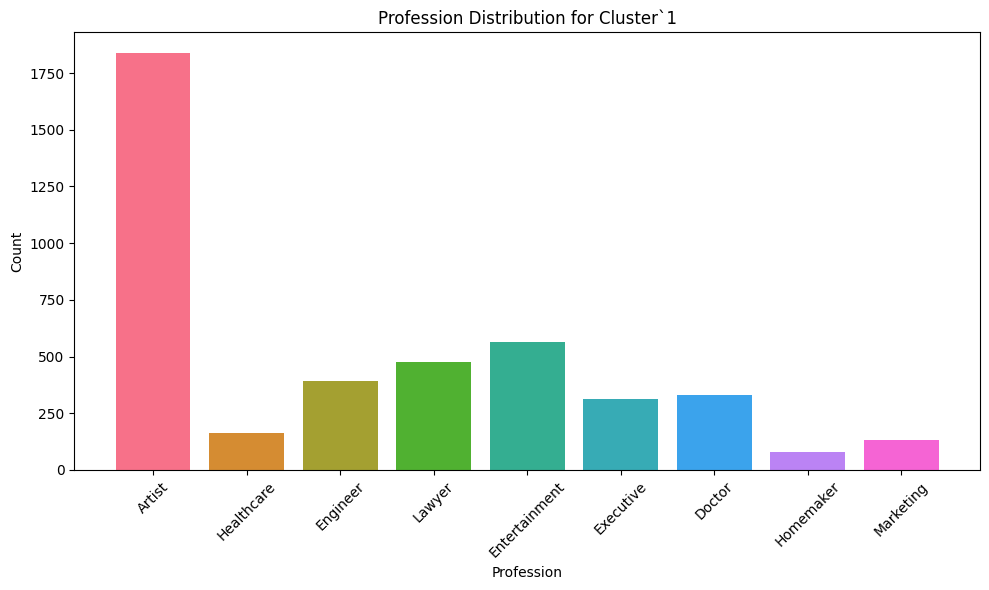

In [53]:


cluster_1 = data[data['Cluster'] == 1]

profession_counts = cluster_1['Profession'].value_counts()
# Define the fixed order of professions

# Define custom color palette
custom_palette = sns.color_palette("husl", len(profession_order))

# Map professions to colors using custom palette
profession_colors = dict(zip(profession_order, custom_palette))

# Plot bar chart with fixed profession order and colors
plt.figure(figsize=(10, 6))
bars = plt.bar(profession_order, [profession_counts.get(profession, 0) for profession in profession_order], color=[profession_colors[profession] for profession in profession_order])

# Add labels and title
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Profession Distribution for Cluster`1')



plt.tight_layout()
plt.show()

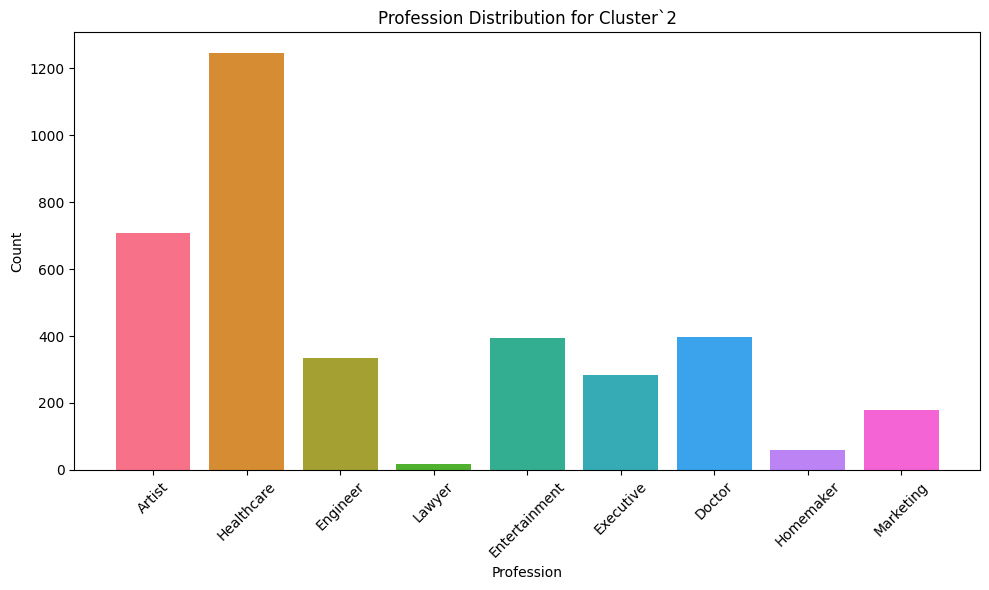

In [54]:


cluster_2 = data[data['Cluster'] == 2]

profession_counts = cluster_2['Profession'].value_counts()
# Define the fixed order of professions

# Define custom color palette
custom_palette = sns.color_palette("husl", len(profession_order))

# Map professions to colors using custom palette
profession_colors = dict(zip(profession_order, custom_palette))

# Plot bar chart with fixed profession order and colors
plt.figure(figsize=(10, 6))
bars = plt.bar(profession_order, [profession_counts.get(profession, 0) for profession in profession_order], color=[profession_colors[profession] for profession in profession_order])

# Add labels and title
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Profession Distribution for Cluster`2')



plt.tight_layout()
plt.show()

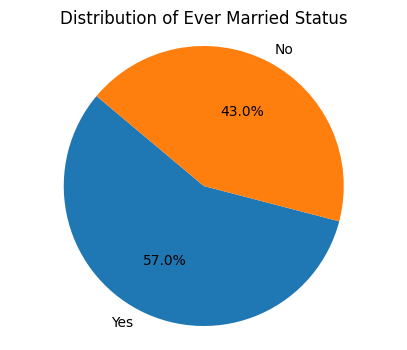

In [55]:

married_counts = data['Ever_Married'].value_counts()


plt.figure(figsize=(5,4))
plt.pie(married_counts, labels=married_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ever Married Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

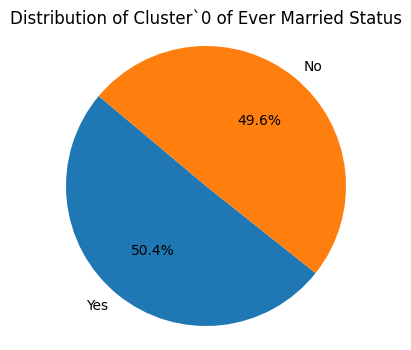

In [56]:
cluster_0 = data[data['Cluster'] == 0]

married_counts = cluster_0['Ever_Married'].value_counts()


plt.figure(figsize=(5,4))
plt.pie(married_counts, labels=married_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cluster`0 of Ever Married Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

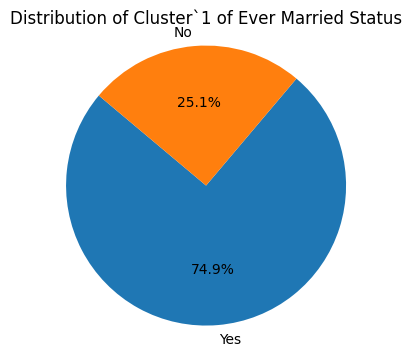

In [57]:
cluster_1 = data[data['Cluster'] == 1]

married_counts = cluster_1['Ever_Married'].value_counts()


plt.figure(figsize=(5,4))
plt.pie(married_counts, labels=married_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cluster`1 of Ever Married Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

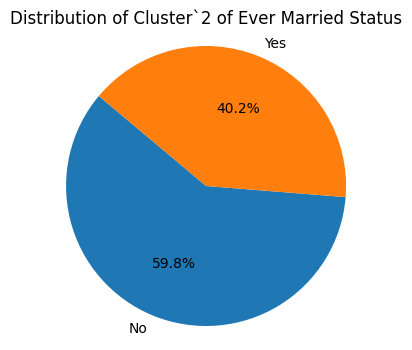

In [58]:
cluster_2 = data[data['Cluster'] == 2]

married_counts = cluster_2['Ever_Married'].value_counts()


plt.figure(figsize=(5,4))
plt.pie(married_counts, labels=married_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cluster`2 of Ever Married Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

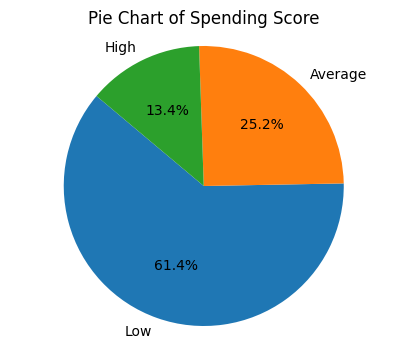

In [59]:


spending = data['Spending_Score'].value_counts()

spending_lab = {1: 'Low', 2: 'Average', 3: 'High'}

spending_labels = [spending_lab[score] for score in spending.keys()]


plt.figure(figsize=(5,4))
plt.pie(spending, labels=spending_labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Spending Score')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

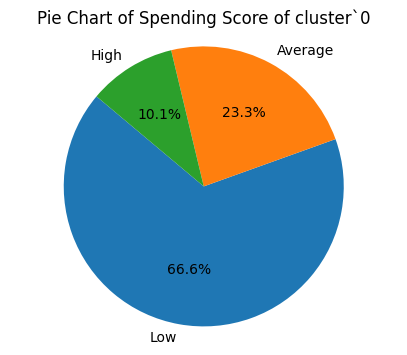

In [60]:
cluster_0 = data[data['Cluster'] == 0]

spending = cluster_0['Spending_Score'].value_counts()

spending_lab = {1: 'Low', 2: 'Average', 3: 'High'}

spending_labels = [spending_lab[score] for score in spending.keys()]


plt.figure(figsize=(5,4))
plt.pie(spending, labels=spending_labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Spending Score of cluster`0')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

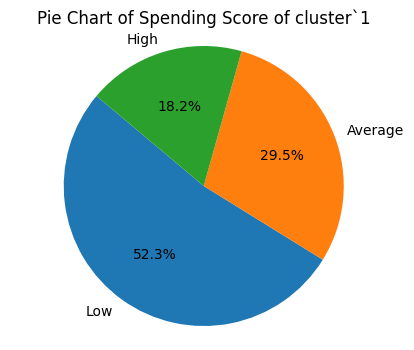

In [61]:
cluster_1 = data[data['Cluster'] == 1]

spending = cluster_1['Spending_Score'].value_counts()

spending_lab = {1: 'Low', 2: 'Average', 3: 'High'}

spending_labels = [spending_lab[score] for score in spending.keys()]


plt.figure(figsize=(5,4))
plt.pie(spending, labels=spending_labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Spending Score of cluster`1')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

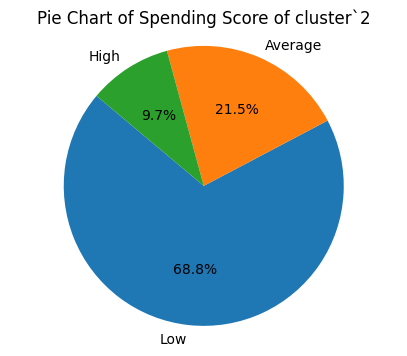

In [62]:
cluster_2 = data[data['Cluster'] == 2]

spending = cluster_2['Spending_Score'].value_counts()

spending_lab = {1: 'Low', 2: 'Average', 3: 'High'}

spending_labels = [spending_lab[score] for score in spending.keys()]


plt.figure(figsize=(5,4))
plt.pie(spending, labels=spending_labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Spending Score of cluster`2')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [63]:

# Define colors for each family
family_colors = {
    1: 'blue',
    2: 'green',
    3: 'red',
    4: 'orange',
    5: 'purple',
    6: 'brown',
    7: 'pink',
    8: 'gray',
    9: 'cyan'
}

fam_order = [1,2,3,4,5,6,7,8,9]


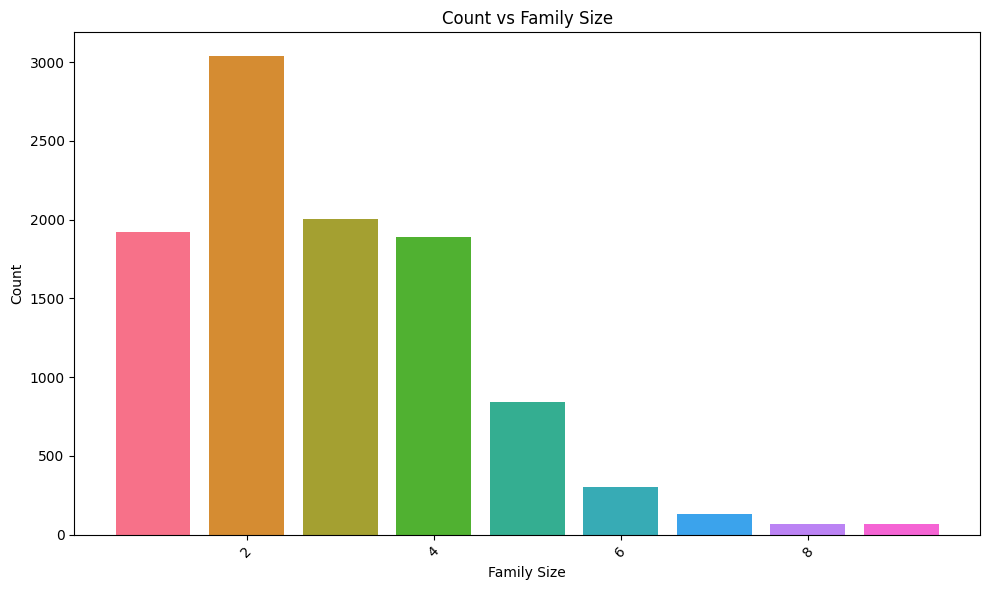

In [64]:
# Count values of 'Family_Size' column
fam_count = data['Family_Size'].value_counts()

# Define the fixed order of family sizes
fam_order = sorted(data['Family_Size'].unique())

# Define custom color palette
custom_palette = sns.color_palette("husl", len(fam_order))

# Map family sizes to colors using custom palette
family_colors = dict(zip(fam_order, custom_palette))

# Plot bar chart with fixed family size order and colors
plt.figure(figsize=(10, 6))
bars = plt.bar(fam_order, [fam_count.get(fam, 0) for fam in fam_order], color=[family_colors[fam] for fam in fam_order])

# Add labels and title
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Count vs Family Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

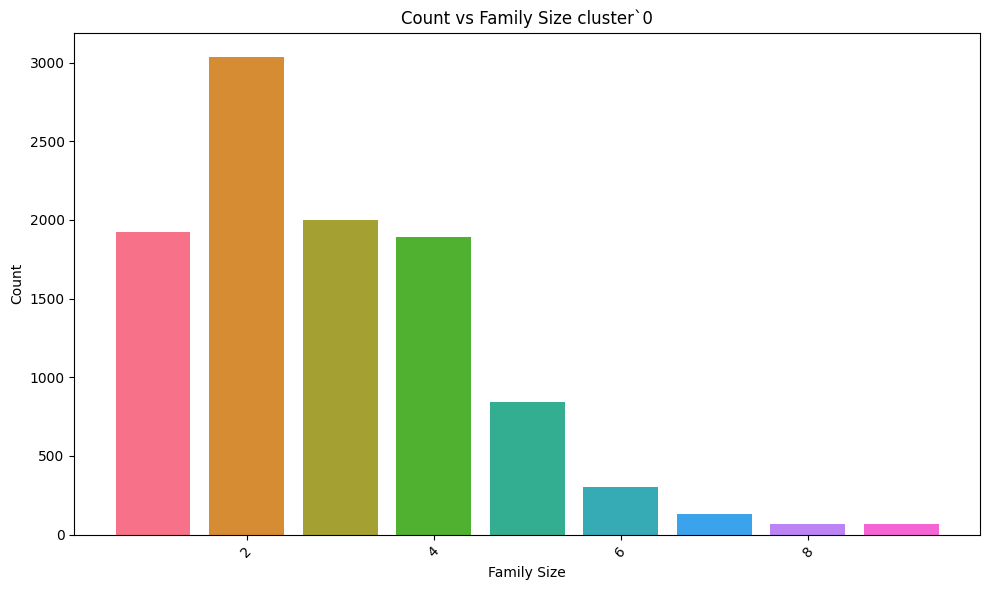

In [65]:
cluster_0 = data[data['Cluster'] == 0]
# Count values of 'Family_Size' column
fam_count_0 = data['Family_Size'].value_counts()

# Define the fixed order of family sizes
fam_order = sorted(data['Family_Size'].unique())

# Define custom color palette
custom_palette = sns.color_palette("husl", len(fam_order))

# Map family sizes to colors using custom palette
family_colors = dict(zip(fam_order, custom_palette))

# Plot bar chart with fixed family size order and colors
plt.figure(figsize=(10, 6))
bars = plt.bar(fam_order, [fam_count_0.get(fam, 0) for fam in fam_order], color=[family_colors[fam] for fam in fam_order])

# Add labels and title
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Count vs Family Size cluster`0')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

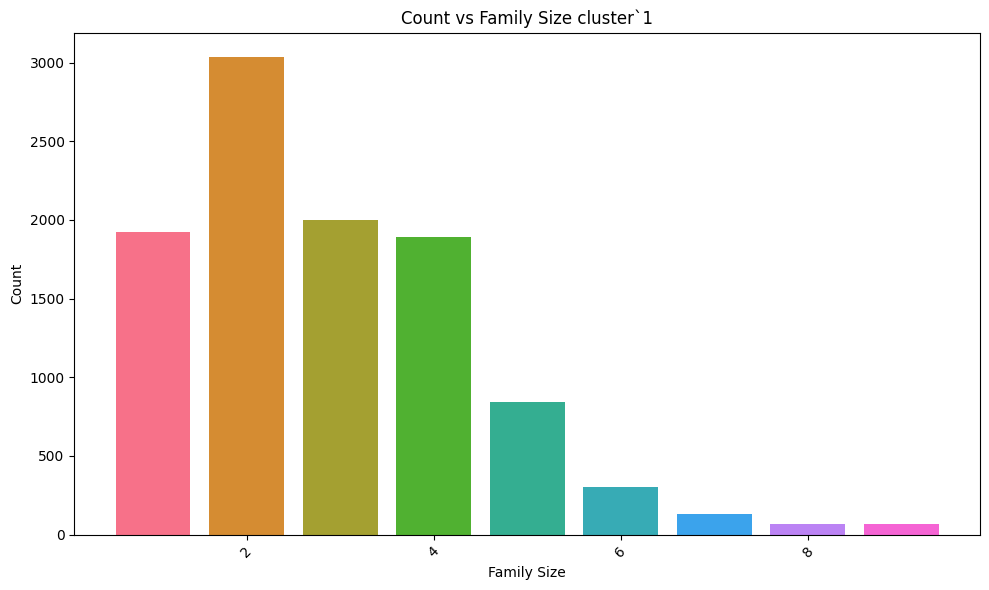

In [66]:
cluster_1 = data[data['Cluster'] == 1]
# Count values of 'Family_Size' column
fam_count_1 = data['Family_Size'].value_counts()

# Define the fixed order of family sizes
fam_order = sorted(data['Family_Size'].unique())

# Define custom color palette
custom_palette = sns.color_palette("husl", len(fam_order))

# Map family sizes to colors using custom palette
family_colors = dict(zip(fam_order, custom_palette))

# Plot bar chart with fixed family size order and colors
plt.figure(figsize=(10, 6))
bars = plt.bar(fam_order, [fam_count_1.get(fam, 0) for fam in fam_order], color=[family_colors[fam] for fam in fam_order])

# Add labels and title
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Count vs Family Size cluster`1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

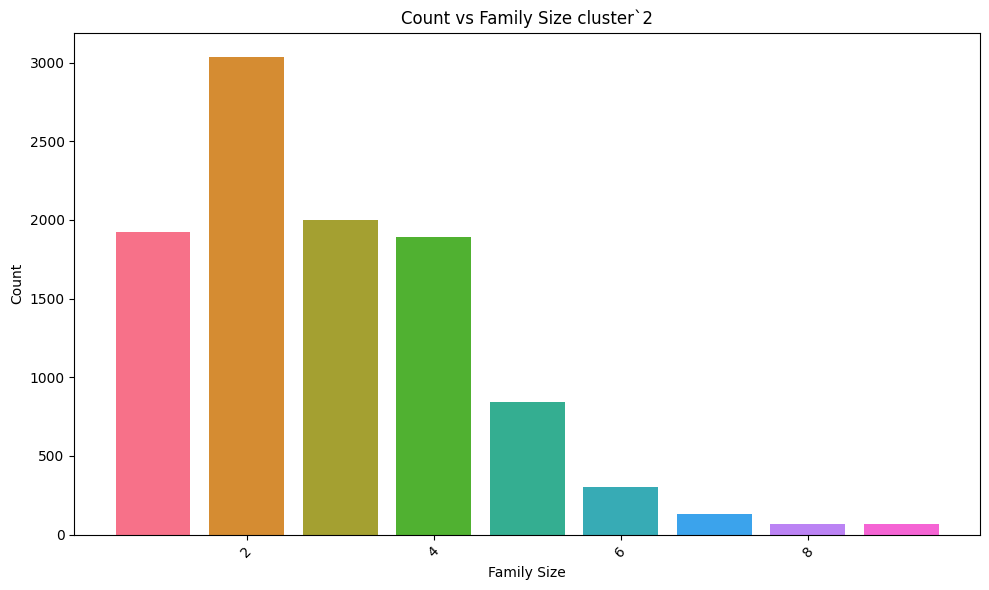

In [67]:
cluster_2 = data[data['Cluster'] == 2]
# Count values of 'Family_Size' column
fam_count_2 = data['Family_Size'].value_counts()

# Define the fixed order of family sizes
fam_order = sorted(data['Family_Size'].unique())

# Define custom color palette
custom_palette = sns.color_palette("husl", len(fam_order))

# Map family sizes to colors using custom palette
family_colors = dict(zip(fam_order, custom_palette))

# Plot bar chart with fixed family size order and colors
plt.figure(figsize=(10, 6))
bars = plt.bar(fam_order, [fam_count_2.get(fam, 0) for fam in fam_order], color=[family_colors[fam] for fam in fam_order])

# Add labels and title
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Count vs Family Size cluster`2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
#profession count of cluster 2

profession_counts

Healthcare       1245
Artist            708
Doctor            398
Entertainment     393
Engineer          333
Executive         285
Marketing         178
Homemaker          59
Lawyer             17
Name: Profession, dtype: int64

In [69]:
data['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

In [70]:
'''original_data=data

L=list(data['Profession'].unique())


data['Profession']=data['Profession'].apply(lambda x:L.index(x)+1 )


data['Ever_Married']=data['Ever_Married'].replace(('Yes','No'),(1,0))
data['Graduated']=data['Graduated'].replace(('Yes','No'),(1,0))
data['Gender']=data['Gender'].replace(('Male','Female'),(1,0))


L=list(data['Spending_Score'].unique())
data['Spending_Score']=data['Spending_Score'].apply(lambda x:L.index(x)+1 )

data.head(5)'''

"original_data=data\n\nL=list(data['Profession'].unique())\n\n\ndata['Profession']=data['Profession'].apply(lambda x:L.index(x)+1 )\n\n\ndata['Ever_Married']=data['Ever_Married'].replace(('Yes','No'),(1,0))\ndata['Graduated']=data['Graduated'].replace(('Yes','No'),(1,0))\ndata['Gender']=data['Gender'].replace(('Male','Female'),(1,0))\n\n\nL=list(data['Spending_Score'].unique())\ndata['Spending_Score']=data['Spending_Score'].apply(lambda x:L.index(x)+1 )\n\ndata.head(5)"

In [71]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Cluster
0,462809,Male,No,22,No,Healthcare,1.0,1,4.0,2
1,462643,Female,Yes,38,Yes,Engineer,1.0,2,3.0,2
2,466315,Female,Yes,67,Yes,Engineer,1.0,1,1.0,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,3,2.0,1
4,462669,Female,Yes,40,Yes,Entertainment,0.0,3,6.0,2


In [73]:
data.to_csv('segmented_customer.csv', index=False)